In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from matplotlib.patches import Ellipse

In [2]:
total_colores=10
palette=iter(cm.rainbow(np.linspace(0,1,total_colores)))


def plot_decision(model,xmin=-10,xmax=10):
    #Model tiene que tener la opción de calculo de predicción (predict)
    x = np.arange(xmin, xmax, .1)
    y = np.arange(xmin, xmax, .1)
    [xv, yv] = np.meshgrid(x, y)
    A=np.concatenate([np.expand_dims(xv.flatten(),axis=1),np.expand_dims(yv.flatten(),axis=1)],axis=1)
    plt.contourf(x,y,np.reshape(model.predict(A),[len(x),len(y)]),30)


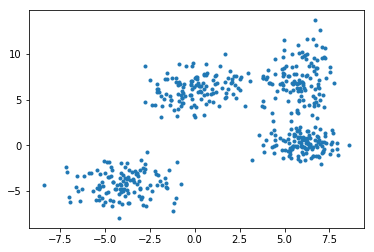

In [15]:
np.random.seed(123)

#  Genera unos datos
n = 500
_mus = np.array([[-4,-4], [0,6],[6,0],[6,7.5]])
_sigmas = np.array([[[2, 0.3], [0.3, 2]], [[2, 0.3], [0.3, 2]], [[1, 0], [0, 1]],[[1, 0.5], [0.5, 5]]])
_pis = np.array([.25, 0.25,.25,.25])

xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

plt.plot(xs[:,0],xs[:,1],'.')
plt.show()

In [16]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3)
#Se de usar fit de manera artificial para luego incluir los valores verdaderos

#Dependiendo de la versión use esto: gmm.fit(np.random.randn(12, 2))
gmm.weights_=_pis
gmm.means_=_mus
gmm.covariances_=_sigmas
gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(_sigmas)).transpose((0, 2, 1))

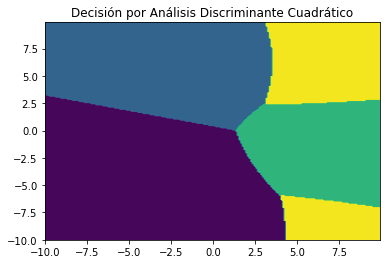

In [17]:
plot_decision(gmm)
plt.title('Decisión por Análisis Discriminante Cuadrático')
plt.show()

In [22]:
_sigmas = np.array([[[2, 0.3], [0.3, 2]], [[2, 0.3], [0.3, 2]],[[2, 0.3], [0.3, 2]],[[2, 0.3], [0.3, 2]]])


gmml = mixture.GaussianMixture(n_components=3)
#Se de usar fit de manera artificial para luego incluir los valores verdaderos
#gmml.fit(np.random.randn(12, 2))
gmml.weights_=_pis
gmml.means_=_mus
gmml.covariances_=_sigmas
gmml.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(_sigmas)).transpose((0, 2, 1))

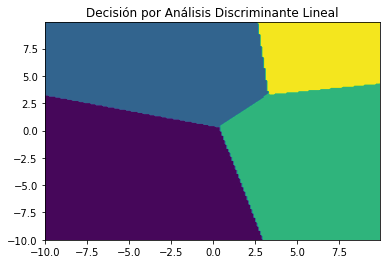

In [23]:
plot_decision(gmml)
plt.title('Decisión por Análisis Discriminante Lineal')
plt.show()